## SALOM, USHBU LOYIHA OpenDataChallenge Hackatoni UCHUN YARATILDI

**Mening ismim Dostonbek Xoldarov, men Data Science sohasini 8 oydan buyon qunt bilan o'rganib kelyapman**

**4-6-dekabr kunlari o'tkaziladigan OpenDataChallenge Hackatoni haqida eshitishim bilan bu menga o'z bilimlarimni sinash va mustahkamlab olish uchun qulay fursat deb o'yladim va qatnashishim kerakligini tushundim**

**Shunday qulay fursatni menga bergan, ushbu Hackatonni tashkillashtirgan tashkilotchilarga ham o'z minnatdorchiligimni bildiraman**

**Ushbu Hackaton uchun men ajoyib bir loyiha tayyorladim va bu sizlarga ma'qul bo'ladi deb o'ylayman**

*Bilamizki hozirgi kunda reklama juda katta biznesga aylanib ketgan va undan keladigan daromad ham juda yuqori*

*Ammo muammolar ham yo'q emas, masalan, siz reklamangizni qo'yish uchun qandaydir mashxur, nufuzi baland telekanal bilan shartnoma tuzdingiz va kelishilgan pulni to'ladingiz, maqsadingiz mahsulotingizni haridorlarga tanitish va ko'proq foyda olish, lekin ish chappasiga ketdi, ya'ni sizning reklamangiz aksariyat odamlarni o'ziga tortmadi, u reklama sizga yoqqan bo'lishi mumkin, lekin odamlarning unga nisbatan bo'lgan munosabatini bilmay turib bu reklamaga katta pul sarflash bu sizning zararingizga ishlaydi, bunday hollarda o'sha telekanallar ham mas'uliyatni o'z zimmasiga olmaydi, chunki ayb sizda*

*Shuning uchun ko'p tadbirkorlar bir nechta reklama andazalarini yaratadi va ularni har birini turli xil ijtimoiy tarmoqlar va odamlar ko'p kiradigan saytlarga qanchadir miqdorda (telekanalga beradigan pulidan kam) pul evaziga qo'yadi va ma'lumot yig'adi ya'ni qancha odam qaysi reklamani ko'rdi, qancha odam reklamani ustiga bosib rasmiy saytimizga kirdi?*

*Lekin shu yerda ya'na bir muammoga duch keladi*

*Bilamizki, internetdan bir kunda millionlab o'zbekiston aholishi foydalanadi, ijtimoiy tarmoqlarni kezadi, qandaydir saytlardagi shaxsiy kabinetiga kiradi va shu reklamalardan biriga ko'zi tushadi va kirish-kirmaslikni o'sha onda hal qiladi, kirish-kirmasligi esa bu reklamaning o'sha odamga yoqishiga bog'liq*

*Aytib o'tganimdek, ma'lumotlarni bir oy mobaynida yig'gandan so'ng, tassavur qiling-a qancha ma'lumot bo'lib ketishini, to'g'ri KB yoki MB da hisoblasa hajmi kam bo'ladi, lekin ichidagi odamlar soni ko'p va ularni har biri har xil reklamaning ustiga bosgan bo'ladi yoki ko'rgan bo'ladi, bu ma'lumotlarni saralash esa oddiy odam uchun juda ham mushkul, shaxsan o'zimning sabrim chidamaydi, shuning uchun kompyuterdan foydalanaman, chunki kompyuter bunday hisoblash amallarini sanoqli soniyalarda bajaradi, lekin shu amallar ketma-ketligini unga ko'rsata bilish kerak, ushbu ko'rsata bilish qobiliyatiga esa Data Analyst va Data Scientistlar ega*

*Men esa quyida Data Science sohasidan olgan bilimlarimdan foydalanib xuddi yuqoridagiga o'xshash muammoni yechishga harakat qilaman*

*Boshladik*

*Birinchi o'rinda ushbu muammoni hal etish uchun men o'zimga kerakli bo'lgan librarylarni import qilaman*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

*Endi men internetdan olgan ma'lumotimni bu yerga olib kelib olaman*

In [7]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [8]:
dataset.head(7)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0


*Ma'lumotni ko'rishingiz mumkinki, [0,1,2,3,4...] bularning bari shu reklamalarni ko'rgan userlarning ID si, ularning ro'parasidagi kataklarga qaysi reklamaga bosganligi haqida ma'lumot joylangan, masalan, agar user 0 ga qarasangiz, Ad 1, Ad 5, Ad 9 larga 1 qo'yganini ko'rasiz, bu degani shu reklamalar unga yoqdi degani, qolganlariga 0 qo'ygan, chunki ular unga yoqmagan, ya'ni qaysi user bo'lishidan qat'iy nazar reklama to'g'risiga 1 qo'ysa shu reklama unga yoqdi degani, 0 qo'ysa aksincha*

In [9]:
len(dataset['Ad 1'])

10000

Quyidagiga ko'ra bizda hozircha 10.000 ta iste'molchining 10 ta reklamadan qaysilarini ma'qullaganligi haqida ma'lumot mavjud

**Navbat ushbu loyihaning eng asosiy qismiga keldi, bu yerda logikani ishlatishga to'g'ri keladi**

In [10]:
# Yana bir kerakli libraryni import qilib olaman
import random
# Kerakli variablelarni belgilab olaman
N = 10000
d = 10
ads_selected = [] # Ushbu listga keyinchalik chiqqan javoblarni avtomatik ravishda yozdiraman
# Bular esa bo'sh arraylar, bu hisob-kitobni to'g'ri amalga oshirish uchun kerak
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
# Bu esa counter
total_reward = 0

for n in range(0, N): # Bu yerda har bir user bilan ishlovchi loop ishlaydi
    # Bular ham kerakli counterlar
    ad = 0
    max_random = 0
    for i in range(0, d): # Bu loop esa har bir reklama bilan ishlaydi
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1) # Bu kerakli formula, uni internetdan olganman
        if random_beta > max_random: # Yuqoridagi formula eng ko'p tanlangan bitta reklamani topish uchun kerak, bu formula bilan yaxshiroq tanishmoqchi bo'lsangiz https://prnt.sc/vvyn1x shu linkka kiring
            max_random = random_beta # Bu yerda counter oshirib boriladi agar statement to'g'ri bo'lsa
            ad = i # Shu yerda qaysi reklama ko'p tanlangani aniq bo'ladi
    ads_selected.append(ad)  # Yuqorida aytganimdek, bu yerda bo'sh listga chiqqan javoblarni yozdiraman
    reward = dataset.values[n, ad] # Bu esa total_reward nomli counterim uchun o'sha reklama necha marta tanlanganini sanaydi
    
    if reward == 1:  # Bu yerda agar reklama tanlangan bo'lsa har bir reklama necha marta tanlangani haqida ma'lumot yaratadi
        numbers_of_rewards_1[ad] += 1  # Bu yerda necha marta tanlanganini sanayapti
    else:  # Bu yerda esa har bir reklama necha marta tanlanmagani haqida ma'lumot yaratadi
        numbers_of_rewards_0[ad] += 1 # Bu esa necha marta tanlanmaganini sanayapti
    
    total_reward += reward # Bu esa barcha tanlangan reklamalar necha marta ko'rilganini hisoblab beradi

*Eng yuqorida aytib o'tganimdek, ushbu hisob-kitob uchun mening kompyuterimga 2 soniya yetarli bo'ldi*

**Endi natijalarni ko'ramiz**

In [11]:
numbers_of_rewards_0

[63, 53, 31, 55, 6658, 32, 49, 378, 38, 43]

Bundan keyingi listda ham xuddi quyidagidek struktura bo'ladi:
[Ad 1, Ad 2, Ad 3, Ad 4, Ad 5, Ad 6, Ad 7, Ad 8, Ad 9, Ad 10]

Ya'ni yuqoridagi ma'lumotga ko'ra 1-reklama(Ad 1) 63 ta odamga yoqmagan, 2-reklama(Ad 2) esa 53 ta odamga yoqmagan va hokazo

In [12]:
numbers_of_rewards_1

[8, 6, 1, 6, 2464, 1, 4, 105, 2, 3]

Bu yerda esa yuqoridagining aksini ko'rasiz, ya'ni 1-reklama(Ad 1) 10000 ta odamdan 8 ta odamga yoqqan, bu juda yomon,
lekin 5-reklama(Ad 5) esa 10000 ta odamdan 2464 tasiga yoqqan, bu esa biz izlayotgan reklama, barcha odamlarning deyarli 25 % i ushbu reklamani ma'qullagan

In [14]:
np.reshape(ads_selected, (100, 100))

array([[6, 3, 7, ..., 3, 7, 7],
       [7, 3, 3, ..., 3, 0, 7],
       [9, 2, 7, ..., 4, 8, 6],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 7, ..., 4, 4, 4]])

Bular esa barcha ko'rilgan reklamarning indekslari

In [15]:
total_reward

2600

Bu son esa reklamalarning bari (o'nalasiham) 2600 marta ko'rilganini bildiradi

In [16]:
# VA NIHOYAT BIZ KUTGAN NATIJA
# HOZIR QAYSI REKLAMA ENG KO'P MA'QULLANGANINI BILIB OLASIZ
ad

4

**Javob chiqdi, 4 ni ko'rib hayron bo'lmang, bu reklamaning tartib raqami emas, bu indeks, Pythonda indeksni sanash 0 dan boshlanadi, ya'ni 0, 1, 2, 3 ... va h.k., 5-element har doim 4-indeksda joylashadi, qisqasi 4 degani 4-indeksdagi reklama degani, 4-indeksda esa Ad 5 turibdi, javob 5-reklama**

# Navbat Vizualizatsiyaga

**Yuqoridagi kodlarni natijasi yanada tushunarliroq bo'lishi uchun, men natijani grafik ko'rinishini ham sizlarga chiqarib beraman**

Text(0, 0.5, "Iste'molchilar soni")

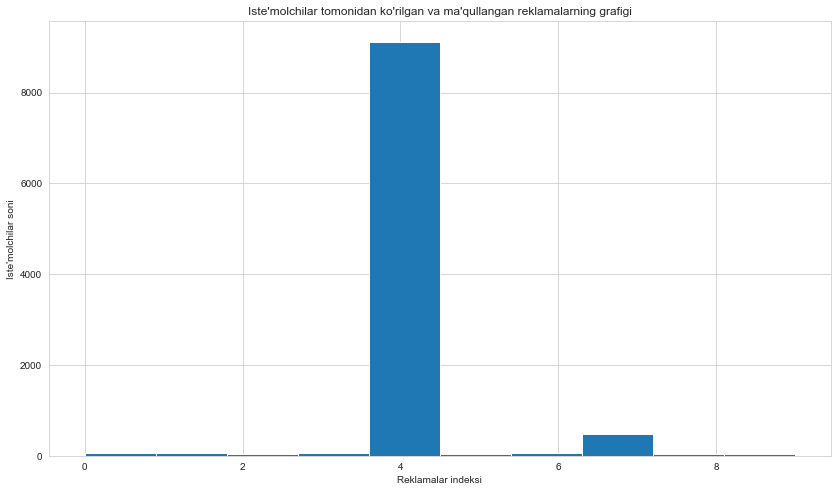

In [18]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
plt.hist(ads_selected)
plt.title("Iste'molchilar tomonidan ko'rilgan va ma'qullangan reklamalarning grafigi")
plt.xlabel('Reklamalar indeksi')
plt.ylabel("Iste'molchilar soni")

**Yuqoridagi grafikdan ko'rish mumkinki, 4-indeksdagi reklama ya'ni 5-reklama juda katta farq bilan qolgan reklamardan ko'ra ko'proq ko'rilgan va ma'qullangan**

*Aziz do'stim, ko'rdingizmi, siz bergan reklamaringizni ko'rgan odamlarni va qaysi reklamani televizorga chiqara olishingiz mumkinligini bilish uchun miyangiz bilan bu ma'lumotlarni saralab, hisoblab chiqishingiz shart emas, bu va shunga o'xshash  muammoni hal etish uchun Data Science sohasini oz-moz bilsangiz kifoya, kompyuterning o'zi barchasini siz uchun qilib beradi*

**Hurmatli Hackaton tashkilotchilari va hakamlar, agar ushbu loyiham sizga yoqqan bo'lsa va bu loyihamni foydali deb topsangiz, men bundan juda mamnun bo'laman. Agar kamchiliklarga yo'l qo'ygan bo'lsam, buning uchun sizlardan uzr so'rayman. Loyiham sizlarga yoqadi degan umiddaman. Ushbu loyiha mukammal bo'lmasligi mumkin, lekin hayotga tatbiq qilsa bo'ladi**

## USHBU MUSOBAQANI TASHKILLASHTIRGAN ODAMLARGA YANA BIR BOR

# RAHMAT